In [92]:
import pandas as pd
import requests
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
geolocator = Nominatim(user_agent="MyApp")
location = geolocator.geocode("Dallas")
location_url = f"https://api.weather.gov/points/{location.latitude},{location.longitude}"
location_obj = requests.get(location_url).json()
location_obj

{'@context': ['https://geojson.org/geojson-ld/geojson-context.jsonld',
  {'@version': '1.1',
   'wx': 'https://api.weather.gov/ontology#',
   's': 'https://schema.org/',
   'geo': 'http://www.opengis.net/ont/geosparql#',
   'unit': 'http://codes.wmo.int/common/unit/',
   '@vocab': 'https://api.weather.gov/ontology#',
   'geometry': {'@id': 's:GeoCoordinates', '@type': 'geo:wktLiteral'},
   'city': 's:addressLocality',
   'state': 's:addressRegion',
   'distance': {'@id': 's:Distance', '@type': 's:QuantitativeValue'},
   'bearing': {'@type': 's:QuantitativeValue'},
   'value': {'@id': 's:value'},
   'unitCode': {'@id': 's:unitCode', '@type': '@id'},
   'forecastOffice': {'@type': '@id'},
   'forecastGridData': {'@type': '@id'},
   'publicZone': {'@type': '@id'},
   'county': {'@type': '@id'}}],
 'id': 'https://api.weather.gov/points/32.7763,-96.7968999',
 'type': 'Feature',
 'geometry': {'type': 'Point', 'coordinates': [-96.7968999, 32.7763]},
 'properties': {'@id': 'https://api.weather

In [43]:
office = location_obj['properties']['forecastOffice']
gridX = location_obj['properties']['gridX']
gridY = location_obj['properties']['gridY']

forecast_url = f"https://api.weather.gov/gridpoints/{office}/{gridX},{gridY}/forecast"

In [44]:
requests.get(forecast_url).json()

{'correlationId': 'cdc14b4',
 'title': 'Not Found',
 'type': 'https://api.weather.gov/problems/NotFound',
 'status': 404,
 'detail': "'/gridpoints/https:/api.weather.gov/offices/FWD/89,104/forecast' is not a valid resource path",
 'instance': 'https://api.weather.gov/requests/cdc14b4'}

In [62]:
df = pd.DataFrame(requests.get("https://api.weather.gov/gridpoints/TOP/31,80/forecast").json()['properties']['periods'])

# first convert the temperature to Celsius
temp = df['temperature']

temp_celsius = []
new_unit = 0
for unit in temp:
    new_unit = round((unit - 32)/1.8)
    temp_celsius.append(new_unit)

# Add new values to df
df['Temperature (Celsius)'] = temp_celsius
df


,number,name,startTime,endTime,isDaytime,temperature,temperatureUnit,temperatureTrend,probabilityOfPrecipitation,dewpoint,relativeHumidity,windSpeed,windDirection,icon,shortForecast,detailedForecast,Temperature (Celsius)
0,1,Today,2023-05-16T11:00:00-05:00,2023-05-16T18:00:00-05:00,True,69,F,None,"{'unitCode': 'wmoUnit:percent', 'value': None}","{'unitCode': 'wmoUnit:degC', 'value': 12.22222...","{'unitCode': 'wmoUnit:percent', 'value': 80}",5 mph,N,https://api.weather.gov/icons/land/day/bkn?siz...,Mostly Cloudy,"Mostly cloudy, with a high near 69. North wind...",21
1,2,Tonight,2023-05-16T18:00:00-05:00,2023-05-17T06:00:00-05:00,False,51,F,None,"{'unitCode': 'wmoUnit:percent', 'value': None}","{'unitCode': 'wmoUnit:degC', 'value': 11.11111...","{'unitCode': 'wmoUnit:percent', 'value': 89}",5 mph,W,https://api.weather.gov/icons/land/night/few?s...,Mostly Clear,"Mostly clear, with a low around 51. West wind ...",11
2,3,Wednesday,2023-05-17T06:00:00-05:00,2023-05-17T18:00:00-05:00,True,79,F,None,"{'unitCode': 'wmoUnit:percent', 'value': None}","{'unitCode': 'wmoUnit:degC', 'value': 13.33333...","{'unitCode': 'wmoUnit:percent', 'value': 93}",0 to 5 mph,N,https://api.weather.gov/icons/land/day/skc?siz...,Sunny,"Sunny, with a high near 79. North wind 0 to 5 ...",26
3,4,Wednesday Night,2023-05-17T18:00:00-05:00,2023-05-18T06:00:00-05:00,False,53,F,None,"{'unitCode': 'wmoUnit:percent', 'value': None}","{'unitCode': 'wmoUnit:degC', 'value': 11.11111...","{'unitCode': 'wmoUnit:percent', 'value': 90}",5 to 10 mph,SE,https://api.weather.gov/icons/land/night/sct?s...,Partly Cloudy,"Partly cloudy, with a low around 53. Southeast...",12
4,5,Thursday,2023-05-18T06:00:00-05:00,2023-05-18T18:00:00-05:00,True,79,F,None,"{'unitCode': 'wmoUnit:percent', 'value': 40}","{'unitCode': 'wmoUnit:degC', 'value': 14.44444...","{'unitCode': 'wmoUnit:percent', 'value': 90}",10 mph,S,https://api.weather.gov/icons/land/day/rain_sh...,Chance Showers And Thunderstorms,A slight chance of rain showers between 7am an...,26
5,6,Thursday Night,2023-05-18T18:00:00-05:00,2023-05-19T06:00:00-05:00,False,55,F,None,"{'unitCode': 'wmoUnit:percent', 'value': 60}","{'unitCode': 'wmoUnit:degC', 'value': 14.44444...","{'unitCode': 'wmoUnit:percent', 'value': 90}",10 to 15 mph,E,https://api.weather.gov/icons/land/night/tsra_...,Chance Showers And Thunderstorms,A chance of showers and thunderstorms before 1...,13
6,7,Friday,2023-05-19T06:00:00-05:00,2023-05-19T18:00:00-05:00,True,70,F,None,"{'unitCode': 'wmoUnit:percent', 'value': 60}","{'unitCode': 'wmoUnit:degC', 'value': 13.33333...","{'unitCode': 'wmoUnit:percent', 'value': 93}",15 mph,N,https://api.weather.gov/icons/land/day/tsra_hi...,Showers And Thunderstorms Likely,Showers and thunderstorms likely before 1pm. P...,21
7,8,Friday Night,2023-05-19T18:00:00-05:00,2023-05-20T06:00:00-05:00,False,45,F,None,"{'unitCode': 'wmoUnit:percent', 'value': None}","{'unitCode': 'wmoUnit:degC', 'value': 8.333333...","{'unitCode': 'wmoUnit:percent', 'value': 89}",5 to 15 mph,N,https://api.weather.gov/icons/land/night/few?s...,Mostly Clear,"Mostly clear, with a low around 45. North wind...",7
8,9,Saturday,2023-05-20T06:00:00-05:00,2023-05-20T18:00:00-05:00,True,72,F,None,"{'unitCode': 'wmoUnit:percent', 'value': None}","{'unitCode': 'wmoUnit:degC', 'value': 7.777777...","{'unitCode': 'wmoUnit:percent', 'value': 93}",5 to 10 mph,N,https://api.weather.gov/icons/land/day/few?siz...,Sunny,"Sunny, with a high near 72. North wind 5 to 10...",22
9,10,Saturday Night,2023-05-20T18:00:00-05:00,2023-05-21T06:00:00-05:00,False,48,F,None,"{'unitCode': 'wmoUnit:percent', 'value': None}","{'unitCode': 'wmoUnit:degC', 'value': 7.777777...","{'unitCode': 'wmoUnit:percent', 'value': 86}",5 to 10 mph,SE,https://api.weather.gov/icons/land/night/few?s...,Mostly Clear,"Mostly clear, with a low around 48.",9


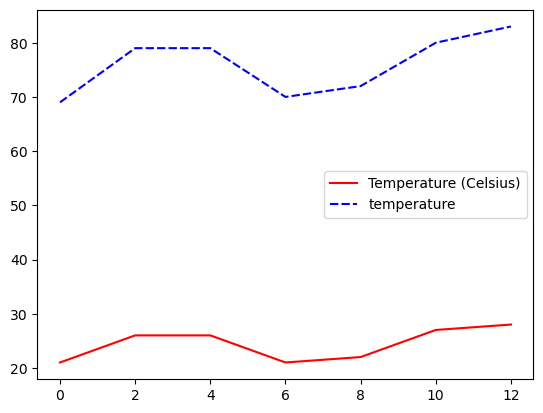

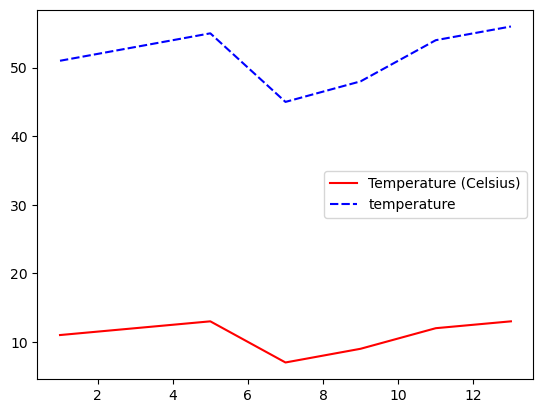

In [97]:
day_temp = df[df['isDaytime'] == True]
night_temp = df[df['isDaytime'] == False]
sns.lineplot(data = day_temp[['Temperature (Celsius)', 'temperature']],
             palette=['red', 'blue'])
plt.show()
sns.lineplot(data = night_temp[['Temperature (Celsius)', 'temperature']],
             palette=['red', 'blue'])
plt.show()